# 神经网络入门：分类与回归

## 影评分类（二分类）

In [4]:
from tensorflow.keras.datasets import imdb
# 仅保留训练数据中前10000个最常出现的单词，低频词将被舍弃
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=1000)

In [5]:
print(train_data[0])
print(train_labels[0])
max([max(sequence) for sequence in train_data])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


999

In [6]:
# 将评论解码为英文单词
word_index = imdb.get_word_index()
reverse_word_index = dict([value, key] for (key, value) in word_index.items())
decoded_review = " ".join(reverse_word_index.get(i - 3, "?") for i in train_data[0])
print(decoded_review)

? this film was just brilliant casting ? ? story direction ? really ? the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same ? ? as myself so i loved the fact there was a real ? with this film the ? ? throughout the film were great it was just brilliant so much that i ? the film as soon as it was released for ? and would recommend it to everyone to watch and the ? ? was amazing really ? at the end it was so sad and you know what they say if you ? at a film it must have been good and this definitely was also ? to the two little ? that played the ? of ? and paul they were just brilliant children are often left out of the ? ? i think because the stars that play them all ? up are such a big ? for the whole film but these children are amazing and should be ? for what they have done don't you think the whole story was so ? because it was true and was ? life after all that was ? with us all


In [7]:
# multi-hot编码对整数序列进行编码
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train[0])

# 标签向量化
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")
print(y_train[0])

[0. 1. 1. ... 0. 0. 0.]
1.0


In [8]:
# 构建模型
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
# 流出验证集
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# 训练：512为一小批量，训练20轮，监控在留出的10000个验证样本上的损失和精度
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=[x_val, y_val])

Epoch 1/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5435 - accuracy: 0.7585 - val_loss: 0.4370 - val_accuracy: 0.8383
Epoch 2/20
30/30 [==============================] - 0s 7ms/step - loss: 0.3978 - accuracy: 0.8483 - val_loss: 0.4107 - val_accuracy: 0.8202
Epoch 3/20
30/30 [==============================] - 0s 7ms/step - loss: 0.3489 - accuracy: 0.8596 - val_loss: 0.3449 - val_accuracy: 0.8565
Epoch 4/20
30/30 [==============================] - 0s 7ms/step - loss: 0.3222 - accuracy: 0.8713 - val_loss: 0.3461 - val_accuracy: 0.8536
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3139 - accuracy: 0.8721 - val_loss: 0.3411 - val_accuracy: 0.8560
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3048 - accuracy: 0.8736 - val_loss: 0.3380 - val_accuracy: 0.8596
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3003 - accuracy: 0.8766 - val_loss: 0.3400 - val_accuracy: 0.8576
Epoch 8/20
30/30 [=

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

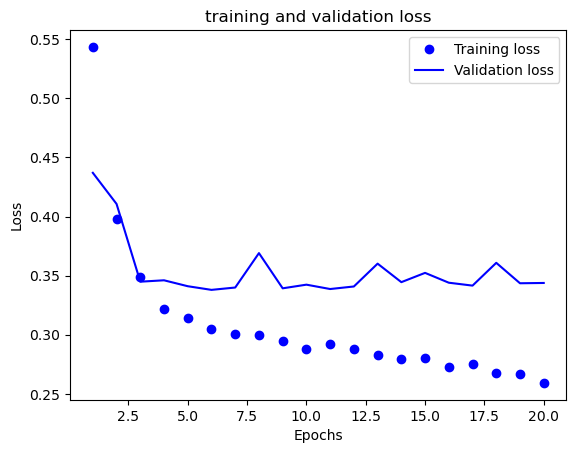

In [13]:
# 绘制 训练损失和验证损失
import matplotlib.pyplot as plt
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

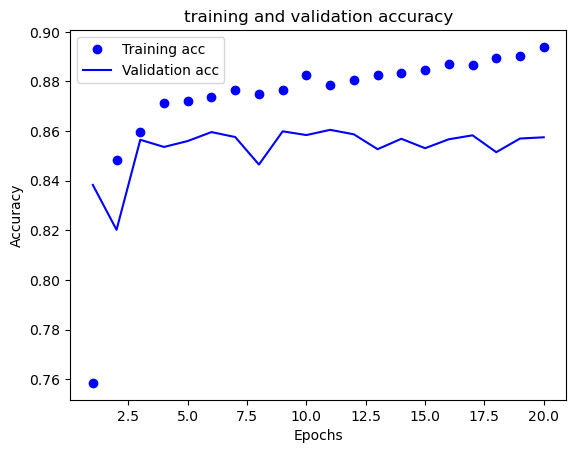

In [14]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [17]:
# 从头开始训练4轮
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
# [损失，精度]
results

Epoch 1/4
49/49 [==============================] - 1s 6ms/step - loss: 0.5301 - accuracy: 0.7791
Epoch 2/4
49/49 [==============================] - 0s 5ms/step - loss: 0.3722 - accuracy: 0.8562
Epoch 3/4
49/49 [==============================] - 0s 4ms/step - loss: 0.3316 - accuracy: 0.8665
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3461 - accuracy: 0.8522


[0.34610438346862793, 0.8522400259971619]

In [18]:
# 预测
model.predict(x_test)

782/782 [==============================] - 1s 837us/step


array([[0.2674037 ],
       [0.98736644],
       [0.28261396],
       ...,
       [0.0712546 ],
       [0.06470847],
       [0.27113244]], dtype=float32)

## 新闻分类：多分类

In [21]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
print(len(train_data))
print(len(test_data))
print(train_data[10])

8982
2246
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [25]:
word_index = reuters.get_word_index()
reverse_word_idnex = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
    [reverse_word_idnex.get(i - 3, "?") for i in train_data[0]]
)
print(decoded_newswire)
print(train_labels[10])

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
3


In [27]:
# 准备数据
# 对数据进行multi-hot编码
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# 对标签进行one-hot编码（也叫分类编码）
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)
print(y_train[0])

# Keras的实现
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
print(y_test[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [30]:
# 构建模型
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
# 训练
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 16ms/step - loss: 2.6645 - accuracy: 0.5530 - val_loss: 1.7470 - val_accuracy: 0.6520
Epoch 2/20
16/16 [==============================] - 0s 8ms/step - loss: 1.4143 - accuracy: 0.7122 - val_loss: 1.3283 - val_accuracy: 0.7120
Epoch 3/20
16/16 [==============================] - 0s 8ms/step - loss: 1.0528 - accuracy: 0.7801 - val_loss: 1.1665 - val_accuracy: 0.7470
Epoch 4/20
16/16 [==============================] - 0s 7ms/step - loss: 0.8323 - accuracy: 0.8271 - val_loss: 1.0545 - val_accuracy: 0.7880
Epoch 5/20
16/16 [==============================] - 0s 7ms/step - loss: 0.6581 - accuracy: 0.8637 - val_loss: 0.9922 - val_accuracy: 0.8070
Epoch 6/20
16/16 [==============================] - 0s 7ms/step - loss: 0.5242 - accuracy: 0.8936 - val_loss: 0.9481 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 0s 6ms/step - loss: 0.4163 - accuracy: 0.9141 - val_loss: 0.9388 - val_accuracy: 0.8060
Epoch 8/20
16/16 [=

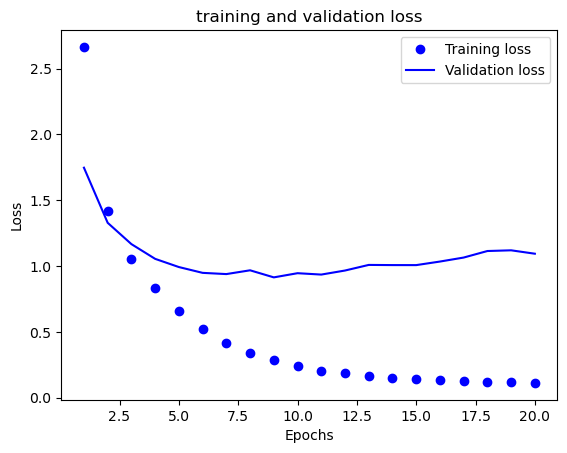

In [34]:
# 绘制 训练损失和验证损失
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

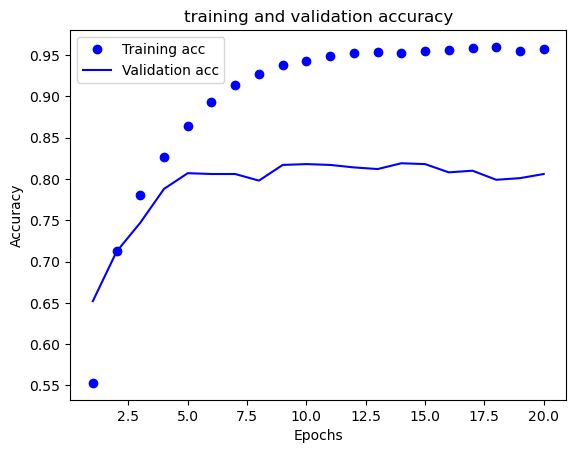

In [35]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [37]:
# 地第9轮后过拟合，重新训练
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/9
16/16 [==============================] - 0s 15ms/step - loss: 2.5822 - accuracy: 0.5431 - val_loss: 1.7056 - val_accuracy: 0.6470
Epoch 2/9
16/16 [==============================] - 0s 8ms/step - loss: 1.4030 - accuracy: 0.7073 - val_loss: 1.2946 - val_accuracy: 0.7190
Epoch 3/9
16/16 [==============================] - 0s 9ms/step - loss: 1.0394 - accuracy: 0.7780 - val_loss: 1.1340 - val_accuracy: 0.7460
Epoch 4/9
16/16 [==============================] - 0s 7ms/step - loss: 0.8120 - accuracy: 0.8282 - val_loss: 1.0346 - val_accuracy: 0.7920
Epoch 5/9
16/16 [==============================] - 0s 7ms/step - loss: 0.6421 - accuracy: 0.8707 - val_loss: 0.9788 - val_accuracy: 0.8020
Epoch 6/9
16/16 [==============================] - 0s 6ms/step - loss: 0.5098 - accuracy: 0.8998 - val_loss: 0.9575 - val_accuracy: 0.7950
Epoch 7/9
16/16 [==============================] - 0s 7ms/step - loss: 0.4045 - accuracy: 0.9218 - val_loss: 0.9005 - val_accuracy: 0.8090
Epoch 8/9
16/16 [=========

In [38]:
# 计算一个随机基准模型的精度
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19902048085485308

In [40]:
# 预测
predictions = model.predict(x_test)
print(predictions[0].shape)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

71/71 [==============================] - 0s 832us/step
(46,)
1.0
3


## 预测房价：标量回归

In [43]:
# 加载数据集
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())
print(train_data.shape)
print(test_data.shape)
print(train_targets)

(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 

In [61]:
# 对每个特征进行数据标准化
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [62]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [63]:
# K折交叉验证
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[: i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0
    )
    partial_train_targets = np.concatenate(
        [train_targets[: i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
         axis=0
    )
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, 
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


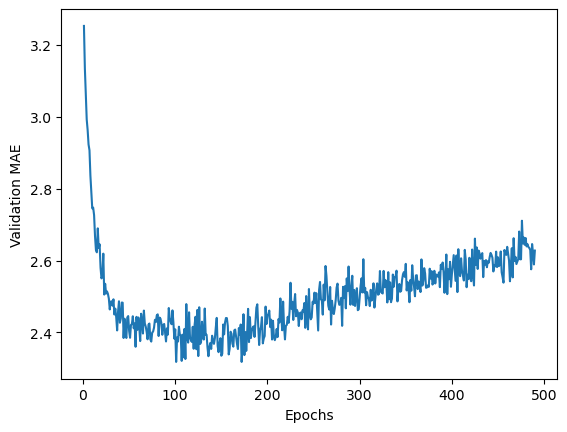

In [64]:
# 计算每轮的K折验证分数平均值
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [66]:
# 130轮后过拟合
model = build_model()
model.fit(train_data, train_targets, epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)

4/4 [==============================] - 0s 1000us/step - loss: 14.0830 - mae: 2.5661
2.566075086593628


In [68]:
# 预测
predictions = model.predict(test_data)
print(predictions[1])
print(test_targets[1])

4/4 [==============================] - 0s 1ms/step
[18.099203]
18.8
